### Question 1: construct 95% prediction intervals for the expenditure on restaurants and prepared food (TSPNDPRPD). Train your conformal prediction intervals on "HW4_train.csv" and apply your method to "HW4_test.csv".


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

train = pd.read_csv("HW4_train.csv")
test = pd.read_csv("HW4_test.csv")

In [13]:
train['AGE']=2023-train['TBIRTH_YEAR']
test['AGE']=2023-test['TBIRTH_YEAR']

In [14]:
### Chose these features because I think they are the most likely to effect prediction
train = train[['PWEIGHT', 'AGE', 'REGION', 'PUBHLTH', 'PRIVHLTH', 'EST_MSA', 'EST_ST', 
           'INCOME', 'LIVQTRRV', 'MOBILITY', 'MS', 'EEDUC', 'RRACE', 'WRKLOSSRV', 'TSPNDPRPD']]  

'''Following drops all -88 and -99 values and Nan values; pub and priv health uses 3 instead of -88 and -99'''
train = train.dropna()

train = train.drop(train[train.REGION == -88].index)
train = train.drop(train[train.REGION == -99].index)

train = train.drop(train[train.PRIVHLTH == 3].index)
train = train.drop(train[train.PRIVHLTH == 3].index)

train = train.drop(train[train.EST_MSA == -88].index)
train = train.drop(train[train.EST_MSA == -99].index)

train = train.drop(train[train.EST_ST == -88].index)
train = train.drop(train[train.EST_ST == -99].index)

train = train.drop(train[train.INCOME == -88].index)
train = train.drop(train[train.INCOME == -99].index)

train = train.drop(train[train.LIVQTRRV == -88].index)
train = train.drop(train[train.LIVQTRRV == -99].index)

train = train.drop(train[train.MOBILITY == -88].index)
train = train.drop(train[train.MOBILITY == -99].index)

train = train.drop(train[train.WRKLOSSRV == -88].index)
train = train.drop(train[train.WRKLOSSRV == -99].index)

train = train.drop(train[train.MS == -88].index)
train = train.drop(train[train.MS == -99].index)

train = train.drop(train[train.EEDUC == -88].index)
train = train.drop(train[train.EEDUC == -99].index)

train = train.drop(train[train.RRACE == -88].index)
train = train.drop(train[train.RRACE == -99].index)

In [4]:
# test = test[['PWEIGHT', 'AGE', 'REGION', 'PUBHLTH', 'PRIVHLTH', 'EST_MSA', 'EST_ST', 
#            'INCOME', 'LIVQTRRV', 'MOBILITY', 'MS', 'EEDUC', 'RRACE', 'WRKLOSSRV']]  

# '''Following drops all -88 and -99 values and Nan values; pub and priv health uses 3 instead of -88 and -99'''
# test = test.dropna()

# test = test.drop(test[test.REGION == -88].index)
# test = test.drop(test[test.REGION == -99].index)

# test = test.drop(test[test.PRIVHLTH == 3].index)
# test = test.drop(test[test.PRIVHLTH == 3].index)

# test = test.drop(test[test.EST_MSA == -88].index)
# test = test.drop(test[test.EST_MSA == -99].index)

# test = test.drop(test[test.EST_ST == -88].index)
# test = test.drop(test[test.EST_ST == -99].index)

# test = test.drop(test[test.INCOME == -88].index)
# test = test.drop(test[test.INCOME == -99].index)

# test = test.drop(test[test.LIVQTRRV == -88].index)
# test = test.drop(test[test.LIVQTRRV == -99].index)

# test = test.drop(test[test.MOBILITY == -88].index)
# test = test.drop(test[test.MOBILITY == -99].index)

# test = test.drop(test[test.WRKLOSSRV == -88].index)
# test = test.drop(test[test.WRKLOSSRV == -99].index)

# test = test.drop(test[test.MS == -88].index)
# test = test.drop(test[test.MS == -99].index)

# test = test.drop(test[test.EEDUC == -88].index)
# test = test.drop(test[test.EEDUC == -99].index)

# test = test.drop(test[test.RRACE == -88].index)
# test = test.drop(test[test.RRACE == -99].index)

In [15]:
### Creating x and y variables
y = train['TSPNDPRPD']
x = train.drop(columns=['TSPNDPRPD'])

In [16]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=213)
trainA_x, trainB_x, trainA_y, trainB_y = train_test_split(x_train, y_train, test_size=0.4, random_state = 213)

In [6]:
clf = tree.DecisionTreeRegressor()

param = {
    "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    "splitter": ["best", "random"],
    "max_depth": [2,5,8,11,14,17,20],
    "min_samples_split": [2,5,8,11,14,17,20],
    "max_features": [1.0, 'sqrt', 'log2', 'None']
    }

grid = GridSearchCV(clf, param_grid=param, cv=10)
grid.fit(trainA_x,trainA_y)

KeyboardInterrupt: 

In [ ]:
clf = tree.DecisionTreeRegressor(criterion= grid.best_params_['criterion'], splitter= grid.best_params_['splitter'], 
                                 max_depth= grid.best_params_['max_depth'], min_samples_split= grid.best_params_['min_samples_split'],
                                 max_features=grid.best_params_['max_features'])
model = clf.fit(trainA_x, trainA_y)

In [ ]:
pred_B = clf.predict(trainB_x)
pred_err_B = trainB_y-pred_B

q = np.quantile(abs(pred_err_B), 0.95)

In [ ]:
pred_test = clf.predict(x_test)
lb = pred_test-q
ub = pred_test+q

for i in range(len(lb)):
    if lb[i] < 0:
        lb[i] = 0    

sum((y_test>=lb) & (y_test<=ub))/len(y_test)

In [ ]:
csv = pd.DataFrame()

csv['TSPNDPRPD_Pred'] = pred_test
for i in range(len(csv)):
    csv['lower_bound'] = lb
    csv['upper_bound'] = ub

In [ ]:
csv

#### Trying with different preprocessing techniques and features used for training

In [10]:
'''First we will try using scalers'''
scaler = StandardScaler()
std_x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(std_x, y, test_size=0.4, random_state=213)
trainA_x, trainB_x, trainA_y, trainB_y = train_test_split(x_train, y_train, test_size=0.4, random_state = 213)

/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:981: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:986: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:1006: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Found input variables with inconsistent numbers of samples: [24641, 8861]

In [10]:
clf = tree.DecisionTreeRegressor()

param = {
    "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    "splitter": ["best", "random"],
    "max_depth": [2,5,8,11,14,17,20],
    "min_samples_split": [2,5,8,11,14,17,20],
    "max_features": [1.0, 'sqrt', 'log2', 'None']
    }

grid = GridSearchCV(clf, param_grid=param, cv=10)
grid.fit(trainA_x,trainA_y)

In [ ]:
clf = tree.DecisionTreeRegressor(criterion= grid.best_params_['criterion'], splitter= grid.best_params_['splitter'], 
                                 max_depth= grid.best_params_['max_depth'], min_samples_split= grid.best_params_['min_samples_split'],
                                 max_features=grid.best_params_['max_features'])
model = clf.fit(trainA_x, trainA_y)

In [ ]:
pred_B = clf.predict(trainB_x)
pred_err_B = trainB_y-pred_B

q = np.quantile(abs(pred_err_B), 0.95)

In [ ]:
pred_test = clf.predict(x_test)
lb = pred_test-q
ub = pred_test+q

sum((y_test>=lb) & (y_test<=ub))/len(y_test)

In [ ]:
csv = pd.DataFrame()

csv['TSPNDPRPD_Pred'] = pred_test
for i in range(len(csv)):
    csv['lower_bound'] = lb
    csv['upper_bound'] = ub

In [ ]:
scaler = RobustScaler()
std_x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(std_x, y, test_size=0.4, random_state=213)
trainA_x, trainB_x, trainA_y, trainB_y = train_test_split(x_train, y_train, test_size=0.4, random_state = 213)

clf = tree.DecisionTreeRegressor()

param = {
    "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    "splitter": ["best", "random"],
    "max_depth": [2,5,8,11,14,17,20],
    "min_samples_split": [2,5,8,11,14,17,20],
    "max_features": [1.0, 'sqrt', 'log2', 'None']
    }

grid = GridSearchCV(clf, param_grid=param, cv=10)
grid.fit(trainA_x,trainA_y)

clf = tree.DecisionTreeRegressor(criterion= grid.best_params_['criterion'], splitter= grid.best_params_['splitter'], 
                                 max_depth= grid.best_params_['max_depth'], min_samples_split= grid.best_params_['min_samples_split'],
                                 max_features=grid.best_params_['max_features'])
model = clf.fit(trainA_x, trainA_y)

pred_B = clf.predict(trainB_x)
pred_err_B = trainB_y-pred_B

q = np.quantile(abs(pred_err_B), 0.95)

pred_test = clf.predict(x_test)
lb = pred_test-q
ub = pred_test+q

sum((y_test>=lb) & (y_test<=ub))/len(y_test)

In [ ]:
scaler = MinMaxScaler()
std_x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(std_x, y, test_size=0.4, random_state=213)
trainA_x, trainB_x, trainA_y, trainB_y = train_test_split(x_train, y_train, test_size=0.4, random_state = 213)

clf = tree.DecisionTreeRegressor()

param = {
    "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    "splitter": ["best", "random"],
    "max_depth": [2,5,8,11,14,17,20],
    "min_samples_split": [2,5,8,11,14,17,20],
    "max_features": [1.0, 'sqrt', 'log2', 'None']
    }

grid = GridSearchCV(clf, param_grid=param, cv=10)
grid.fit(trainA_x,trainA_y)
grid.best_params_

clf = tree.DecisionTreeRegressor(criterion= grid.best_params_['criterion'], splitter= grid.best_params_['splitter'], 
                                 max_depth= grid.best_params_['max_depth'], min_samples_split= grid.best_params_['min_samples_split'],
                                 max_features=grid.best_params_['max_features'])
model = clf.fit(trainA_x, trainA_y)

pred_B = clf.predict(trainB_x)
pred_err_B = trainB_y-pred_B

q = np.quantile(abs(pred_err_B), 0.95)

pred_test = clf.predict(x_test)
lb = pred_test-q
ub = pred_test+q

sum((y_test>=lb) & (y_test<=ub))/len(y_test)

Standard Scaler seem to produce the best estimations

In [ ]:
'''Following Code tests different features'''
train2 = train[['PWEIGHT', 'AGE', 'REGION', 'PUBHLTH', 'PRIVHLTH', 'EST_MSA', 'EST_ST', 
           'INCOME', 'LIVQTRRV', 'MOBILITY', 'MS', 'EEDUC', 'RRACE', 'WRKLOSSRV', 'TSPNDPRPD']] 

y = train2['TSPNDPRPD']
x = train2.drop(columns=['TSPNDPRPD'])


x = SelectKBest(f_classif, k=2).fit_transform(x,y)

In [ ]:
display(train2)
display(pd.DataFrame(x))

Top 5 features chosen using SelectKBest are ['Age', 'PUBHLTH', 'PRIVHLTH', 'INCOME', 'MOBILITY']
<br>
Top 3 features chosen using SelectKBest are ['Age', 'PUBHLTH','INCOME']
<br>
Top 2 features chosen using SelectKBest are ['Age', 'INCOME']

In [17]:
scaler = StandardScaler()
std_x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(std_x, y, test_size=0.4, random_state=213)
trainA_x, trainB_x, trainA_y, trainB_y = train_test_split(x_train, y_train, test_size=0.4, random_state = 213)

clf = tree.DecisionTreeRegressor()

param = {
    "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    "splitter": ["best", "random"],
    "max_depth": [2,5,8,11,14,17,20],
    "min_samples_split": [2,5,8,11,14,17,20],
    "max_features": [1.0, 'sqrt', 'log2', 'None']
    }

grid = GridSearchCV(clf, param_grid=param, cv=10)
grid.fit(trainA_x,trainA_y)
grid.best_params_

clf = tree.DecisionTreeRegressor(criterion= grid.best_params_['criterion'], splitter= grid.best_params_['splitter'], 
                                 max_depth= grid.best_params_['max_depth'], min_samples_split= grid.best_params_['min_samples_split'],
                                 max_features=grid.best_params_['max_features'])
model = clf.fit(trainA_x, trainA_y)

pred_B = clf.predict(trainB_x)
pred_err_B = trainB_y-pred_B

q = np.quantile(abs(pred_err_B), 0.95)

pred_test = clf.predict(x_test)
lb = pred_test-q
ub = pred_test+q

print(sum((y_test>=lb) & (y_test<=ub))/len(y_test))

csv = pd.DataFrame()

csv['TSPNDPRPD_Pred'] = pred_test
csv['lower_bound'] = lb
csv['upper_bound'] = ub

csv

0.9497884344146685


/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3920 fits failed out of a total of 15680.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3920 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1342, in fit
    super().fit(
  File "/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 317, in fit
    raise ValueError(
ValueErro

,TSPNDPRPD_Pred,lower_bound,upper_bound
0,145.713542,-93.755366,385.182449
1,114.825963,-124.642945,354.294870
2,168.231092,-71.237815,407.700000
3,66.715976,-172.752931,306.184884
4,114.825963,-124.642945,354.294870
...,...,...,...
3540,63.418552,-176.050356,302.887460
3541,92.712000,-146.756908,332.180908
3542,66.715976,-172.752931,306.184884
3543,114.825963,-124.642945,354.294870


Using more features seems to help the regression model produce better predictions that fit in the interval or I can increase the cv in GridSearch when there are less features to learn from. <br> For convenience, I will use all 15 features I picked out by intuition.
<br><br>
However, increasing cv with all features included does not significantly increase performance so cv will remain at 10

In [18]:
x = test

In [19]:
scaler = StandardScaler()
std_x = scaler.fit_transform(x)

pred_B = clf.predict(trainB_x)
pred_err_B = trainB_y-pred_B

q = np.quantile(abs(pred_err_B), 0.95)

pred_test = clf.predict(x_test)
lb = pred_test-q
ub = pred_test+q

for i in range(len(lb)):
    if lb[i] < 0:
        lb[i] = 0

sum((y_test>=lb) & (y_test<=ub))/len(y_test)

csv = pd.DataFrame()

csv['TSPNDPRPD_Pred'] = pred_test
csv['lower_bound'] = lb
csv['upper_bound'] = ub

csv

/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:981: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:986: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:1006: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,TSPNDPRPD_Pred,lower_bound,upper_bound
0,145.713542,0.0,385.182449
1,114.825963,0.0,354.294870
2,168.231092,0.0,407.700000
3,66.715976,0.0,306.184884
4,114.825963,0.0,354.294870
...,...,...,...
3540,63.418552,0.0,302.887460
3541,92.712000,0.0,332.180908
3542,66.715976,0.0,306.184884
3543,114.825963,0.0,354.294870


In [ ]:
np.savetxt('/Users/ericwang/Desktop/ECON_148/HW4/HW4_Q1.csv',csv, delimiter=',')

### Question 2: suppose that you want to consider the effect of having Covid (HADCOVID) on restaurant expenditure (TSPNDPRPD). You are willing to assume that the unconfoundedness assumption holds once we include age (TBIRTH_YEAR) and vaccination status (RECVDVACC) as confounders. At 5% significance level, can you say that the effect of having Covid always has no effect on restaurant expenditure? 

In [7]:
import statsmodels.api as sm

# Load the data
df = pd.read_csv("HW4_train.csv")

# Create a regression model with HADCOVID, TBIRTH_YEAR, and RECVDVACC as predictors
x = df[["HADCOVID", "TBIRTH_YEAR", "RECVDVACC"]]
x = sm.add_constant(x)
y = df["TSPNDPRPD"]
model = sm.OLS(y, x).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              TSPNDPRPD   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     295.2
Date:                Fri, 31 Mar 2023   Prob (F-statistic):          6.00e-189
Time:                        22:56:16   Log-Likelihood:            -1.8734e+05
No. Observations:               31002   AIC:                         3.747e+05
Df Residuals:                   30998   BIC:                         3.747e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2093.2865     75.268    -27.811      

In [9]:
# Test the null hypothesis that the effect of HADCOVID is equal to zero
t_stat = model.tvalues["HADCOVID"]
p_value = model.pvalues["HADCOVID"]
alpha = 0.05

# Print the test results
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that HADCOVID has an effect on TSPNDPRPD.")
else:
    print("Fail to reject the null hypothesis. There is no evidence that HADCOVID has an effect on TSPNDPRPD.")


Reject the null hypothesis. There is evidence that HADCOVID has an effect on TSPNDPRPD.


### Question 3: suppose that you want to consider the effect of having Covid (HADCOVID) on restaurant expenditure (TSPNDPRPD). You are willing to assume that the unconfoundedness assumption holds once we include enough confounders. For confounders, use age (TBIRTH_YEAR), vaccination status (RECVDVACC) and grocery expenditure (TSPNDFOOD). 

In [ ]:
"""
D = HADCOVID, X = TBIRTH_YEAR, RECVDVACC, TSPNFOOD
Y = f(D, X)
''' Treatment effect of D'''
Y = f(1, X) - f(0, X)
"""

In [14]:
train = pd.read_csv('HW4_train.csv')
train['AGE']=2023-train['TBIRTH_YEAR']

In [16]:
from sklearn.neighbors import KNeighborsRegressor

x = train[['AGE', 'RECVDVACC', 'TSPNDFOOD', 'HADCOVID']]
y = train['TSPNDPRPD']

treatment = train
treatment['HADCOVID'] = 2
x_treatment = treatment[['AGE', 'RECVDVACC', 'TSPNDFOOD', 'HADCOVID']]
y_treatment = treatment['TSPNDPRPD']

control = train
control['HADCOVID'] = 1
x_control = control[['AGE', 'RECVDVACC', 'TSPNDFOOD', 'HADCOVID']]
y_control = control['TSPNDPRPD']

In [19]:
### Prediction
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(x, y)
treated_y_pred = knn.predict(x_treatment)
control_y_pred = knn.predict(x_control)

### Calculate CATE
CATE = treated_y_pred - control_y_pred

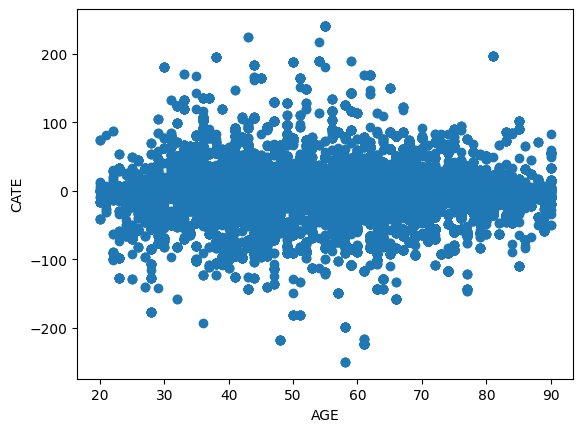

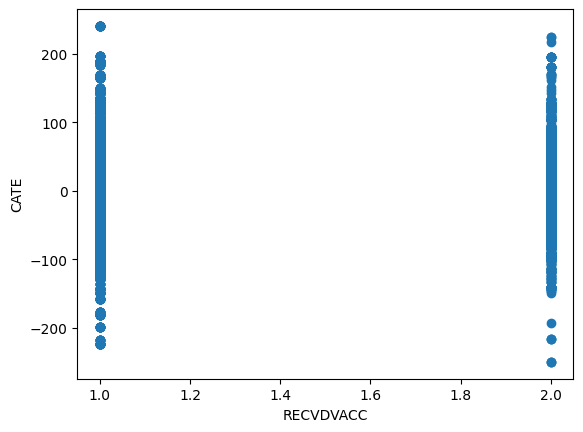

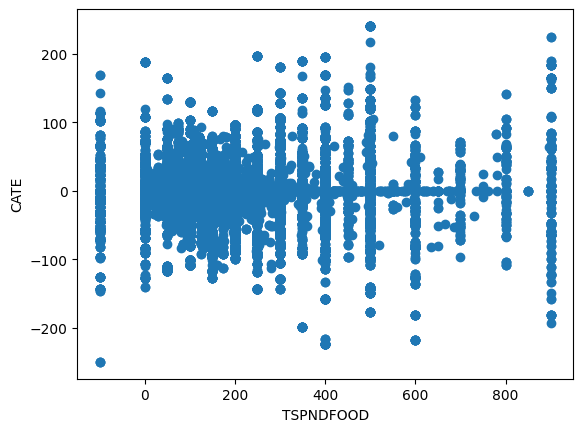

In [21]:
# Create scatter plot of CATE vs TBIRTH_YEAR
plt.scatter(train['AGE'], CATE)
plt.xlabel('AGE')
plt.ylabel('CATE')
plt.show()

# Create scatter plot of CATE vs RECVDVACC
plt.scatter(train['RECVDVACC'], CATE)
plt.xlabel('RECVDVACC')
plt.ylabel('CATE')
plt.show()

# Create scatter plot of CATE vs TSPNDFOOD
plt.scatter(train['TSPNDFOOD'], CATE)
plt.xlabel('TSPNDFOOD')
plt.ylabel('CATE')
plt.show()
